## groupby() 함수
> groupby()는 주로 **열(column)**을 기준으로 데이터를 그룹화합니다. 이후 각 그룹에 대해 집계(예: 평균, 합계, 개수 등) 또는 변환을 수행할 수 있습니다.

In [ ]:
import pandas as pd

# 예시 데이터프레임
df = pd.DataFrame(
    {"Category": ["A", "B", "A", "B", "A", "B"], "Value": [10, 20, 30, 40, 50, 60]}
)
df

,Category,Value
0,A,10
1,B,20
2,A,30
3,B,40
4,A,50
5,B,60


In [ ]:
# Category 열을 기준으로 그룹화하고, 각 그룹의 Value 합계 계산
grouped = df.groupby("Category")["Value"].mean()
print(grouped)

Category
A    30.0
B    40.0
Name: Value, dtype: float64


In [28]:
import pandas as pd
import numpy as np

# 임의의 데이터 생성
np.random.seed(42)

# 200개의 샘플을 생성
data = {
    "ID": range(1, 201),
    "Age": np.random.randint(18, 70, 200),
    "Salary": np.random.randint(30000, 120000, 200),
    "JoinDate": pd.to_datetime(
        np.random.choice(pd.date_range("2010-01-01", "2024-01-01", freq="D"), 200)
    ),
    "Department": np.random.choice(["HR", "Engineering", "Marketing", "Sales"], 200),
}

df = pd.DataFrame(data)

# 예시 데이터 출력
print(df.head())

   ID  Age  Salary   JoinDate   Department
0   1   56   88053 2020-07-14        Sales
1   2   69   51959 2022-04-23           HR
2   3   46   35530 2017-05-25           HR
3   4   32   33748 2012-08-29  Engineering
4   5   60   43545 2013-03-12        Sales


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          200 non-null    int64         
 1   Age         200 non-null    int32         
 2   Salary      200 non-null    int32         
 3   JoinDate    200 non-null    datetime64[ns]
 4   Department  200 non-null    object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 6.4+ KB


In [ ]:
# 부서별 평균 Salary와 Age 계산
df_grouped = (
    df.groupby("Department").agg({"Salary": "mean", "Age": "mean"}).reset_index()
)
df_grouped

,Department,Salary,Age
0,Engineering,69940.930233,39.930233
1,HR,74215.632353,46.632353
2,Marketing,78425.395349,43.534884
3,Sales,70936.086957,41.847826


In [ ]:
df_grouped["Age"] = df_grouped["Age"].astype(int)
df_grouped["Salary"] = df_grouped["Salary"].astype(int).apply(lambda x: f"{x:,}$")

# 그룹화 결과 출력
print(df_grouped)

    Department   Salary  Age
0  Engineering  69,940$   39
1           HR  74,215$   46
2    Marketing  78,425$   43
3        Sales  70,936$   41


In [ ]:
# 나이대 생성 (20대, 30대, 40대, ...)
df["AgeGroup"] = pd.cut(
    df["Age"], bins=[18, 29, 39, 49, 59, 70], labels=["20s", "30s", "40s", "50s", "60s"]
)
print(df)
print(df["AgeGroup"].value_counts())

      ID  Age  Salary   JoinDate   Department AgeGroup
0      1   56   88053 2020-07-14        Sales      50s
1      2   69   51959 2022-04-23           HR      60s
2      3   46   35530 2017-05-25           HR      40s
3      4   32   33748 2012-08-29  Engineering      30s
4      5   60   43545 2013-03-12        Sales      60s
..   ...  ...     ...        ...          ...      ...
195  196   69  118891 2013-05-02           HR      60s
196  197   30  117545 2014-03-21    Marketing      30s
197  198   58  119912 2018-11-11           HR      50s
198  199   20  100316 2016-07-14           HR      20s
199  200   56   32368 2020-03-08        Sales      50s

[200 rows x 6 columns]
AgeGroup
40s    43
50s    42
20s    40
60s    36
30s    34
Name: count, dtype: int64


In [35]:
# 부서별, 나이대별 평균 Salary 계산
df_grouped_age = (
    df.groupby(["Department", "AgeGroup"])
    .agg({"Salary": "mean"})
    .astype(int)
    .reset_index()
)

# 결과 출력
print(df_grouped_age)

     Department AgeGroup  Salary
0   Engineering      20s   82927
1   Engineering      30s   54684
2   Engineering      40s   77273
3   Engineering      50s   64838
4   Engineering      60s   58671
5            HR      20s   93663
6            HR      30s   71029
7            HR      40s   68392
8            HR      50s   69270
9            HR      60s   74467
10    Marketing      20s   78948
11    Marketing      30s   77102
12    Marketing      40s   78859
13    Marketing      50s   77060
14    Marketing      60s   80412
15        Sales      20s   80436
16        Sales      30s   87935
17        Sales      40s   56644
18        Sales      50s   56206
19        Sales      60s   68368


C:\Users\데스크\AppData\Local\Temp\ipykernel_11048\3544406417.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Department", "AgeGroup"])


In [37]:
# 데이터 생성을 위한 코드
import pandas as pd
import numpy as np

# 난수 생성기 시드 설정 (재현성 위해)
np.random.seed(0)

# 랜덤 이름, 나이, 점수 생성
names = [
    "Alice",
    "Bob",
    "Charlie",
    "David",
    "Eve",
    "Frank",
    "Grace",
    "Hannah",
    "Ivy",
    "Jack",
    "Kim",
    "Lee",
]
age = np.random.randint(20, 50, size=100)  # 나이는 20-50 사이에서 랜덤 생성
score = np.random.randint(60, 100, size=100)  # 점수는 60-100 사이에서 랜덤 생성
city = np.random.choice(
    ["Seoul", "Busan", "Incheon"], size=100
)  # 도시 목록에서 랜덤으로 선택

# 랜덤하게 이름 선택
name = np.random.choice(names, size=100)

# DataFrame 생성
df = pd.DataFrame(
    {
        "name": name,
        "age": age.astype(int),  # int형으로 변환
        "score": score.astype(int),  # int형으로 변환
        "city": city,
    }
)
df

,name,age,score,city
0,Jack,32,66,Incheon
1,Jack,35,64,Seoul
2,Charlie,41,63,Seoul
3,Alice,20,72,Busan
4,Lee,23,96,Seoul
...,...,...,...,...
95,Alice,45,75,Busan
96,Ivy,30,71,Busan
97,Grace,40,98,Busan
98,Ivy,31,89,Incheon


In [ ]:
# 'city'를 기준으로 그룹화하여 평균 점수 계산
grouped = df.groupby(["city", "name"]).mean().astype(int)
print(grouped)

                 age  score
city    name               
Busan   Alice     29     84
        Bob       38     85
        Charlie   24     71
        David     35     74
        Eve       39     80
        Grace     36     79
        Hannah    35     70
        Ivy       34     78
        Jack      31     71
        Kim       37     78
        Lee       39     73
Incheon Alice     36     76
        Bob       30     73
        David     34     69
        Eve       40     76
        Frank     20     79
        Grace     38     86
        Hannah    36     94
        Ivy       31     82
        Jack      35     75
        Kim       34     79
        Lee       32     77
Seoul   Bob       27     80
        Charlie   31     66
        David     26     74
        Eve       26     95
        Frank     27     84
        Hannah    34     74
        Ivy       28     82
        Jack      27     77
        Kim       33     73
        Lee       25     93


In [ ]:
# 'city'를 기준으로 'age'와 'score'에 대해 여러 집계 함수 적용
grouped = (
    df.groupby("city")
    .agg({"age": ["mean", "max"], "score": ["max", "sum"]})
    .astype(int)
)
print(grouped)

         age     score      
        mean max   max   sum
city                        
Busan     34  48    98  3196
Incheon   34  49    96  2351
Seoul     29  44    99  2285


In [ ]:
# 그룹화 후 변환: 각 그룹의 평균을 빼서 데이터 정규화
df["normalized_score"] = (
    df.groupby("city")["score"].transform(lambda x: x - x.mean()).astype(int)
)
print(df)

       name  age  score     city  normalized_score
0      Jack   32     66  Incheon               -12
1      Jack   35     64    Seoul               -14
2   Charlie   41     63    Seoul               -15
3     Alice   20     72    Busan                -5
4      Jack   23     96    Seoul                17
..      ...  ...    ...      ...               ...
95   Hannah   45     75    Busan                -2
96    Grace   30     71    Busan                -6
97     Jack   40     98    Busan                20
98      Eve   31     89  Incheon                10
99      Bob   24     61    Busan               -16

[100 rows x 5 columns]


### pivot() 함수
> pivot() 함수는 데이터를 재구성하는 데 사용됩니다. 주로 **행(row)**과 **열(column)**을 기준으로 데이터를 변환하여 원하는 형태로 데이터를 **피벗(pivot)**할 수 있습니다. pivot()을 사용하면 인덱스와 열을 기준으로 데이터를 재구성할 수 있습니다.

> - 2.1 기본 사용법
> - pivot() 함수는 index, columns, values 매개변수를 사용하여 데이터를 재구성합니다.

> - index: 행 인덱스로 사용할 열
> - columns: 열 인덱스로 사용할 열
> - values: 피벗할 값이 있는 열

In [6]:
import pandas as pd
import numpy as np

# 임의의 데이터 생성
np.random.seed(42)

# 200개의 샘플을 생성
data = {
    "ID": range(1, 201),
    "Age": np.random.randint(18, 70, 200),
    "Salary": np.random.randint(30000, 120000, 200),
    "JoinDate": pd.to_datetime(
        np.random.choice(pd.date_range("2010-01-01", "2024-01-01", freq="D"), 200)
    ),
    "Department": np.random.choice(["HR", "Engineering", "Marketing", "Sales"], 200),
}

df = pd.DataFrame(data)

# 예시 데이터 출력
print(df.head())

   ID  Age  Salary   JoinDate   Department
0   1   56   88053 2020-07-14        Sales
1   2   69   51959 2022-04-23           HR
2   3   46   35530 2017-05-25           HR
3   4   32   33748 2012-08-29  Engineering
4   5   60   43545 2013-03-12        Sales


In [7]:
# 부서별 평균 Salary 계산 (피벗)
df_pivot = (
    df.pivot_table(values="Salary", index="Department", aggfunc="mean")
    .astype(int)
    .map(lambda x: f"{x:,}")
)

# 피벗 결과 출력
print(df_pivot)

             Salary
Department         
Engineering  69,940
HR           74,215
Marketing    78,425
Sales        70,936


In [8]:
# 나이대 생성 (20대, 30대, 40대, ...)
df["AgeGroup"] = pd.cut(
    df["Age"], bins=[18, 29, 39, 49, 59, 70], labels=["20s", "30s", "40s", "50s", "60s"]
)

# 부서별, 나이대별 평균 Salary 계산
df_grouped_age = (
    df.groupby(["Department", "AgeGroup"])
    .agg({"Salary": "mean"})
    .astype(int)
    .reset_index()
)

# 결과 출력
print(df_grouped_age)

     Department AgeGroup  Salary
0   Engineering      20s   82927
1   Engineering      30s   54684
2   Engineering      40s   77273
3   Engineering      50s   64838
4   Engineering      60s   58671
5            HR      20s   93663
6            HR      30s   71029
7            HR      40s   68392
8            HR      50s   69270
9            HR      60s   74467
10    Marketing      20s   78948
11    Marketing      30s   77102
12    Marketing      40s   78859
13    Marketing      50s   77060
14    Marketing      60s   80412
15        Sales      20s   80436
16        Sales      30s   87935
17        Sales      40s   56644
18        Sales      50s   56206
19        Sales      60s   68368


/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_10359/3405579629.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Department", "AgeGroup"])


In [9]:
# 부서별, 나이대별 평균 Salary 계산 (피벗)
df_pivot_age = (
    df.pivot_table(
        values="Salary", index="Department", columns="AgeGroup", aggfunc=["mean", "sum"]
    ).astype(int)
    # .map(lambda x: f"{x:,}$")
)

# 피벗 결과 출력
print(df_pivot_age)

              mean                                  sum                  \
AgeGroup       20s    30s    40s    50s    60s      20s     30s     40s   
Department                                                                
Engineering  82927  54684  77273  64838  58671   746350  492156  695464   
HR           93663  71029  68392  69270  74467  1030295  568235  957493   
Marketing    78948  77102  78859  77060  80412   631586  616822  867449   
Sales        80436  87935  56644  56206  68368   965243  791416  509802   

                               
AgeGroup         50s      60s  
Department                     
Engineering   583548   234687  
HR           1108326  1265953  
Marketing     693545   562890  
Sales         449653   546946  


/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_10359/754589455.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(
/var/folders/h8/dk4pn1l11_5f5z7pscs8gr0r0000gn/T/ipykernel_10359/754589455.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(


In [ ]:
# 부서별 평균 Salary 계산 (피벗)
df_pivot = df.pivot_table(values="Salary", index="Department", aggfunc="mean").astype(
    int
)

# 피벗 결과 출력
print(df_pivot)

             Salary
Department         
Engineering   69940
HR            74215
Marketing     78425
Sales         70936


In [11]:
# 30대 이상이고, Salary가 50,000 이상인 데이터 선택
df_filtered_age = df[(df["Age"] >= 30) & (df["Salary"] >= 50000)]

# 결과 출력
print(df_filtered_age)

      ID  Age  Salary   JoinDate   Department AgeGroup
0      1   56   88053 2020-07-14        Sales      50s
1      2   69   51959 2022-04-23           HR      60s
6      7   38   64766 2017-08-06    Marketing      30s
7      8   56  103530 2015-06-06    Marketing      50s
8      9   36   91087 2012-05-03           HR      30s
..   ...  ...     ...        ...          ...      ...
191  192   56   80993 2014-03-23           HR      50s
192  193   50   59592 2013-04-06  Engineering      50s
195  196   69  118891 2013-05-02           HR      60s
196  197   30  117545 2014-03-21    Marketing      30s
197  198   58  119912 2018-11-11           HR      50s

[110 rows x 6 columns]


In [15]:
df_filtered_age = df[["AgeGroup"]]

In [17]:
# 부서별 평균 Salary가 60,000 이상이고, 나이대가 30대 이상인 부서만 선택
df_filtered_complex = df_grouped_age[
    (df_grouped_age["Salary"] >= 60000)
    & (df_grouped_age["AgeGroup"].isin(["30s", "40s", "50s"]))
]

# 결과 출력
print(df_filtered_complex)

     Department AgeGroup  Salary
2   Engineering      40s   77273
3   Engineering      50s   64838
6            HR      30s   71029
7            HR      40s   68392
8            HR      50s   69270
11    Marketing      30s   77102
12    Marketing      40s   78859
13    Marketing      50s   77060
16        Sales      30s   87935


In [21]:
df

,ID,Age,Salary,JoinDate,Department,AgeGroup
0,1,56,88053,2020-07-14,Sales,50s
1,2,69,51959,2022-04-23,HR,60s
2,3,46,35530,2017-05-25,HR,40s
3,4,32,33748,2012-08-29,Engineering,30s
4,5,60,43545,2013-03-12,Sales,60s
...,...,...,...,...,...,...
195,196,69,118891,2013-05-02,HR,60s
196,197,30,117545,2014-03-21,Marketing,30s
197,198,58,119912,2018-11-11,HR,50s
198,199,20,100316,2016-07-14,HR,20s


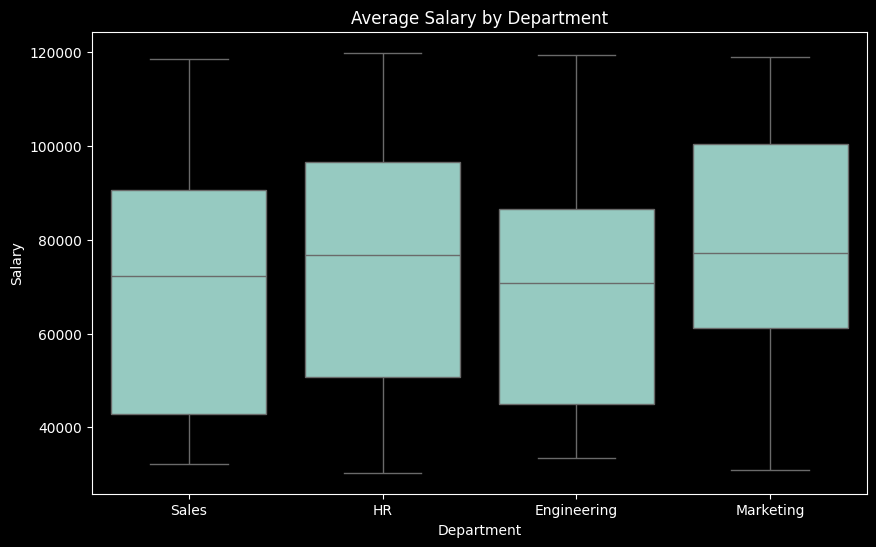

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 부서별 평균 Salary를 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x="Department", y="Salary", data=df)
plt.title("Average Salary by Department")
plt.show()

# 부서별, 나이대별 평균 연봉 시각화
# plt.figure(figsize=(12, 6))
# sns.heatmap(df_pivot_age, annot=True, cmap='YlGnBu', fmt='.0f', linewidths=0.5)
# plt.title('Average Salary by Department and Age Group')
# plt.show()

In [28]:
import pandas as pd
import numpy as np

# 난수 생성기 시드 설정 (재현성 위해)
np.random.seed(0)

# 랜덤 이름, 나이, 점수 생성
names = [
    "Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hannah", "Ivy", "Jack", "Kim", "Lee",
]
age = np.random.randint(20, 50, size=100)  # 나이는 20-50 사이에서 랜덤 생성
score = np.random.randint(60, 100, size=100)  # 점수는 60-100 사이에서 랜덤 생성
city = np.random.choice(["Seoul", "Busan", "Incheon"], size=100)  # 도시 목록에서 랜덤으로 선택

# 랜덤하게 이름 선택
name = np.random.choice(names, size=100)

# DataFrame 생성
df = pd.DataFrame({
    "name": name,
    "age": age.astype(int),  # int형으로 변환
    "score": score.astype(int),  # int형으로 변환
    "city": city,
})

# 피벗 테이블 생성 (중복 데이터를 처리하기 위해 'score'의 평균 사용)
pivot_df = df.pivot_table(index="age", columns="score", values="name", aggfunc='count', fill_value=0)
print(pivot_df)


score  60  61  62  63  64  65  66  67  68  69  ...  89  90  91  92  93  94  \
age                                            ...                           
20      0   0   0   0   0   0   0   0   0   0  ...   0   0   1   0   0   0   
21      1   0   0   0   0   0   0   0   0   0  ...   1   0   0   1   0   0   
22      0   0   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   
23      0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
24      0   1   0   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   
25      0   0   1   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   
26      0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   1   0   
27      0   0   1   0   0   0   0   0   0   0  ...   0   0   0   0   0   1   
28      1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
29      1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   
30      0   0   0   0   0   0   0   0   0   0  ...   0   0   0  

In [ ]:
# 중복된 값이 있는 예시
df = pd.DataFrame(
    {
        "date": ["2022-01-01", "2022-01-01", "2022-01-02", "2022-01-02"],
        "city": ["Seoul", "Seoul", "Busan", "Busan"],
        "temperature": [5, 7, 10, 12],
    }
)

# pivot_table()을 사용하여 중복값을 평균으로 처리
pivot_df = df.pivot_table(
    index="date", columns="city", values="temperature", aggfunc="mean"
)
print(pivot_df)

city        Busan  Seoul
date                    
2022-01-01    NaN    6.0
2022-01-02   11.0    NaN


In [29]:
names = [
    "Alice",
    "Bob",
    "Charlie",
    "David",
    "Eve",
    "Frank",
    "Grace",
    "Hannah",
    "Ivy",
    "Jack",
]
age = np.random.randint(20, 50, size=100)  # 나이는 20-50 사이에서 랜덤 생성
score = np.random.randint(60, 100, size=100)  # 점수는 60-100 사이에서 랜덤 생성
city = np.random.choice(
    ["Seoul", "Busan", "Incheon"], size=100
)  # 도시 목록에서 랜덤으로 선택

# 랜덤하게 이름 선택
name = np.random.choice(names, size=100)

# 예시 데이터프레임
df = pd.DataFrame(
    {
        "name": name,
        "age": age.astype(int),  # int형으로 변환
        "score": score.astype(int),  # int형으로 변환
        "city": city,
    }
)

# 1. 'city'와 'name'을 기준으로 평균 점수 계산 (groupby 사용)
grouped_df = df.groupby(["city", "name"]).agg({"score": "mean"})
print("Groupby result:")
print(grouped_df)

# 2. 'city'와 'name'을 기준으로 피벗 (pivot_table 사용)
pivot_df = df.pivot_table(index="city", columns="name", values="score", aggfunc="mean")
print("\nPivot Table result:")
print(pivot_df)

Groupby result:
                     score
city    name              
Busan   Alice    79.666667
        Bob      93.000000
        Charlie  85.400000
        David    78.600000
        Eve      82.000000
        Frank    79.500000
        Grace    84.571429
        Hannah   69.666667
        Ivy      64.000000
        Jack     83.000000
Incheon Alice    67.000000
        Bob      76.600000
        Charlie  82.500000
        David    84.250000
        Eve      61.000000
        Frank    79.666667
        Grace    71.500000
        Hannah   76.000000
        Ivy      77.600000
        Jack     83.000000
Seoul   Alice    72.333333
        Bob      79.666667
        Charlie  77.000000
        David    90.000000
        Eve      74.750000
        Grace    86.750000
        Hannah   82.500000
        Jack     88.000000

Pivot Table result:
name         Alice        Bob  Charlie  David    Eve      Frank      Grace  \
city                                                                       

### pivot_table()의 주요 매개변수:
> - index: 행 인덱스 기준이 되는 열
> - columns: 열 인덱스 기준이 되는 열
> - values: 피벗하려는 값이 들어 있는 열
> - aggfunc: 중복 값에 대한 집계 함수(기본값은 mean으로 평균을 계산)